<a href="https://colab.research.google.com/github/abhi-11nav/Convolution_NN-Implementation/blob/main/mnist_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Importing pandas and numpy library

import pandas as pd
import numpy as np

In [50]:
# Chekcking for GPU type 
!nvidia-smi

Tue Jun 21 13:07:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    32W /  70W |   1262MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [51]:
import tensorflow as tf 
from tensorflow import keras 

In [52]:
dataset = tf.keras.datasets.cifar10.load_data()

In [53]:
(train_X,train_y),(test_X,test_y) = dataset

In [54]:
print(train_X.shape,"\n",train_y.shape,"\n",test_X.shape,"\n",test_y.shape)

(50000, 32, 32, 3) 
 (50000, 1) 
 (10000, 32, 32, 3) 
 (10000, 1)


In [55]:
# Importing Library for Data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [56]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense
from tensorflow.keras.models import Model, Sequential

In [57]:
model = tf.keras.models.Sequential()

In [58]:
model.add(keras.layers.Conv2D(32,(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Dense(10,activation="softmax"))

In [59]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [60]:
model.build(train_X.shape)

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (50000, 32, 32, 32)       896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (50000, 16, 16, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (50000, 16, 16, 64)       18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (50000, 8, 8, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (50000, 8, 8, 64)         36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (50000, 4, 4, 64)       

In [62]:
history = model.fit(train_X,train_y,epochs=10,validation_split=0.3)

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
import matplotlib.pyplot as plt

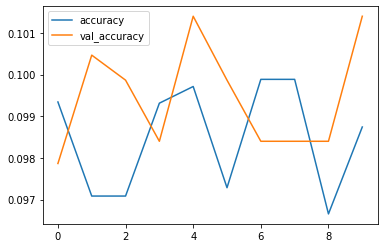

In [ ]:
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()

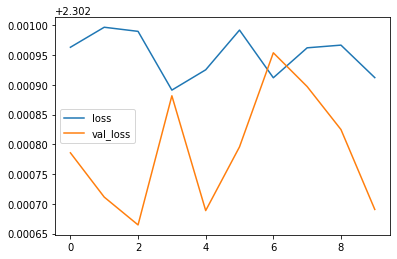

In [ ]:
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()